In [1]:
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import geopandas as gpd
from mpl_toolkits.mplot3d import Axes3D

import sys  
sys.path.insert(0, './src')

import helper
import model

import sklearn.preprocessing
import sklearn.decomposition
import sklearn


from pymongo import MongoClient

In [2]:
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score, recall_score # evaluation metric

In [1]:
pwd

'/Users/bahar/Desktop/fraud_detection'

In [3]:
main_df = pd.read_json('data/data.json')

In [4]:
main_df['acct_type'].unique()

array(['fraudster_event', 'premium', 'spammer_warn', 'fraudster',
       'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock',
       'tos_warn', 'fraudster_att', 'spammer_web', 'spammer'],
      dtype=object)

### meanings:
0 : Not Fraud - 'premium' <br>1 : Maybe Fraud - 'spammer_warn', 'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock', 'tos_warn', 'fraudster_att', 'spammer_web', 'spammer' <br>2 : Fraud - 'fraudster_event', 'fraudster'

In [221]:
#main_df.head(2)

In [10]:
main_df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'],
      dtype='object')

In [5]:
main_df.shape

(14337, 44)

<AxesSubplot:>

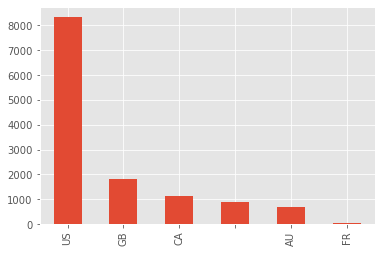

In [8]:
main_df['venue_country'].value_counts()[:6].plot(kind='bar')

In [5]:
df = helper.prep_df(main_df)
df.head()

,approx_payout_date,body_length,channels,country,currency,delivery_method,email_domain,event_created,event_end,event_published,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,prev_payout_count,Fraud
0,1266062400,3852,5,66,6,0.0,2084,1262739706,1265630400,1.263110e+09,...,1259613950,1,7479,64,25.777471,-80.133433,3832,126,0,2
1,1296720000,3499,0,66,6,1.0,4220,1293832670,1296288000,1.293833e+09,...,1280942776,3,0,64,32.776566,-79.930922,7878,337,49,0
2,1296172800,2601,8,66,6,1.0,4015,1291090956,1295740800,1.291092e+09,...,1272559388,3,451,64,33.944201,-118.080419,4631,51,36,0
3,1388966400,12347,6,31,2,1.0,2524,1360681570,1388534400,1.360683e+09,...,1283870102,3,0,-1,-1.000000,-1.000000,-1,-1,21,0
4,1297900800,2417,11,66,6,0.0,444,1291994666,1297468800,1.291995e+09,...,1288984065,3,9530,64,42.353848,-71.044276,2819,213,49,0


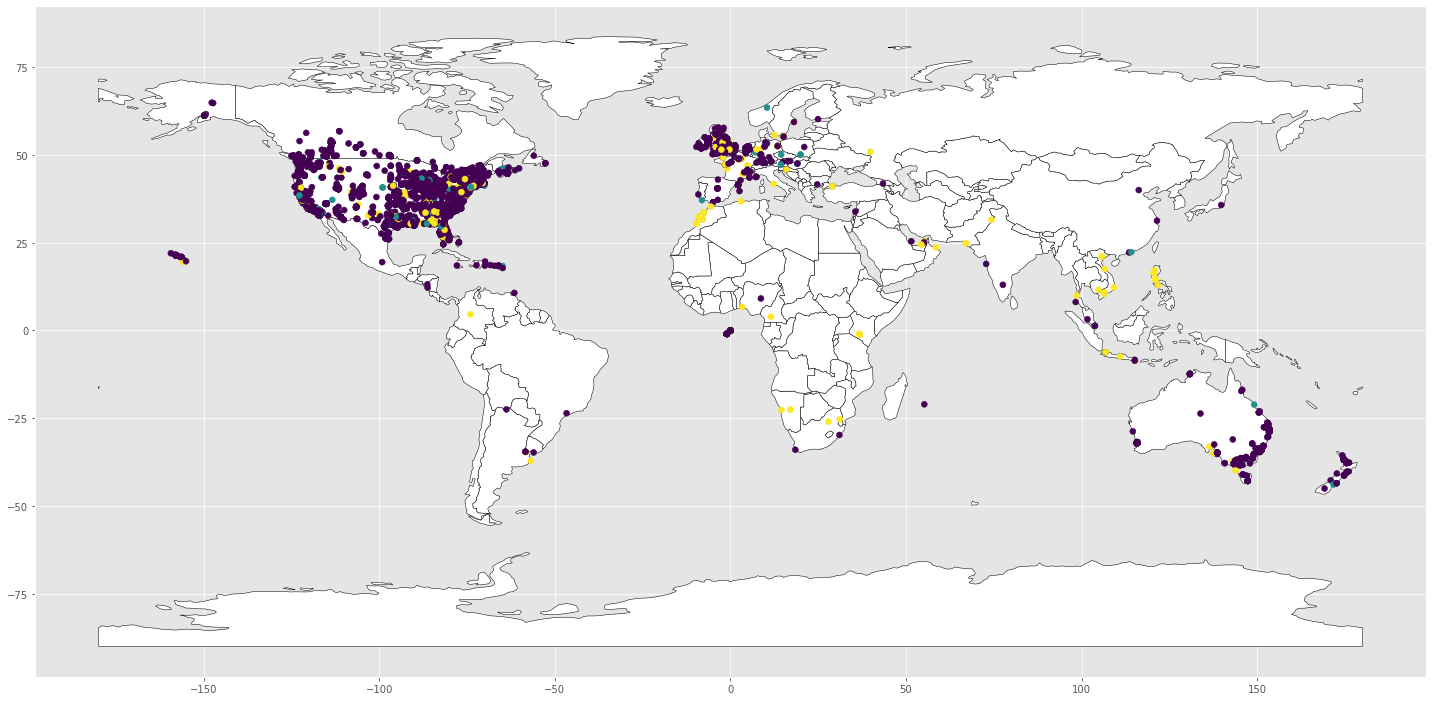

In [8]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.plot(figsize = (15,10))

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.venue_longitude, df.venue_latitude))

ax = world.plot(color='white', edgecolor='black', figsize = (20,10))


gdf.plot(ax=ax,c=df['Fraud'], legend=True)

plt.tight_layout()
plt.savefig('images/world.png', dpi= 300)
plt.show()


In [18]:
df.Fraud.unique()

array([2, 0, 1])

0    12373
2     1293
1      671
Name: Fraud, dtype: int64


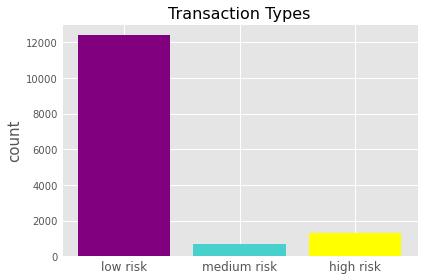

In [23]:
print(df.Fraud.value_counts())
fig , ax = plt.subplots()
colors = ['purple','yellow','mediumturquoise']
graph = plt.bar([0,2,1], df.Fraud.value_counts(), color = colors)
#plt.xlabel('transaction', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(np.arange(3), ['low risk', 'medium risk', 'high risk'],fontsize=12, rotation = 0)
plt.title('Transaction Types', fontsize=16)
plt.tight_layout()

plt.savefig('images/transactions', dpi= 300)

In [179]:
#df['acct_type'].unique()
#df.columns
#df.groupby('acct_type').count()
#df.describe()
#df.info()
pd.set_option('display.max_columns', None)

In [27]:
#plt.style.available

[0.18922791 0.10473989 0.08432686]
           pc_1      pc_2      pc_3  label
0     -0.408632  0.350891  0.115595      2
1     -0.587971  0.337748  0.275619      0
2     -0.599348  0.860845 -0.113817      0
3      0.948825  0.957065  0.385476      0
4     -0.560526  0.636778  0.461793      0
...         ...       ...       ...    ...
14332 -0.264930 -0.104579 -0.579044      2
14333 -0.526189  0.576574 -0.154646      0
14334 -0.062828 -0.619509  0.438163      0
14335 -0.448207 -0.211969 -0.103098      1
14336  0.546047 -0.434468 -0.413963      2

[14337 rows x 4 columns]


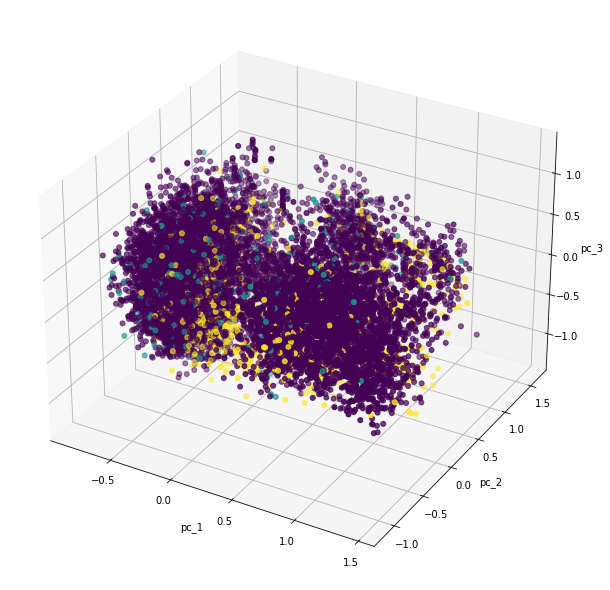

In [259]:
import matplotlib.pyplot as plt

def show_pca_df(df):
    x = df[df.columns[0:-1]].to_numpy()
    y = df[df.columns[-1]].to_numpy()

    x = sklearn.preprocessing.MinMaxScaler().fit_transform(x)
    pca = sklearn.decomposition.PCA(n_components=3)
    pca_result = pca.fit_transform(x)
    print(pca.explained_variance_ratio_)

    pca_df = pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])
    pca_df = pd.concat([pca_df, pd.DataFrame({'label': y})], axis=1)
    print(pca_df)

    ax = Axes3D(plt.figure(figsize=(8, 8)))
    ax.scatter(xs=pca_df['pc_1'], ys=pca_df['pc_2'], zs=pca_df['pc_3'], c=pca_df['label'], s=25)
    ax.set_xlabel("pc_1")
    ax.set_ylabel("pc_2")
    ax.set_zlabel("pc_3")
    #plt.legend()
    plt.show()


show_pca_df(df)

[0.18384996 0.10970751 0.09700078]
          pc_1      pc_2      pc_3  label
0    -0.288010 -0.480919  0.154765      2
1    -0.587329 -0.137900  0.410537      1
2    -0.325864 -0.600325  0.542791      2
3    -0.460604 -0.225863  0.226493      1
4    -0.564069 -0.685461 -0.137232      2
...        ...       ...       ...    ...
2959  0.224454 -0.043934  0.247592      0
2960 -0.444437 -0.379212  0.216646      0
2961 -0.639536 -0.073235 -0.148869      0
2962  0.178885  0.131570  0.152538      0
2963 -0.531429 -0.531924 -0.145368      0

[2964 rows x 4 columns]


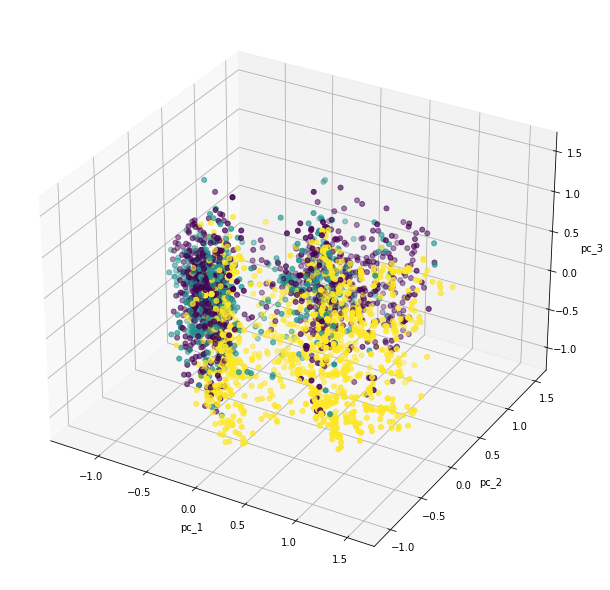

In [260]:
df_anomaly = df[df[df.columns[-1]] > 0]
df_normal = df[df[df.columns[-1]] == 0].sample(n=1000, random_state=1, axis='index')
df_2 = pd.concat([df_anomaly, df_normal])

show_pca_df(df_2)

## correlation

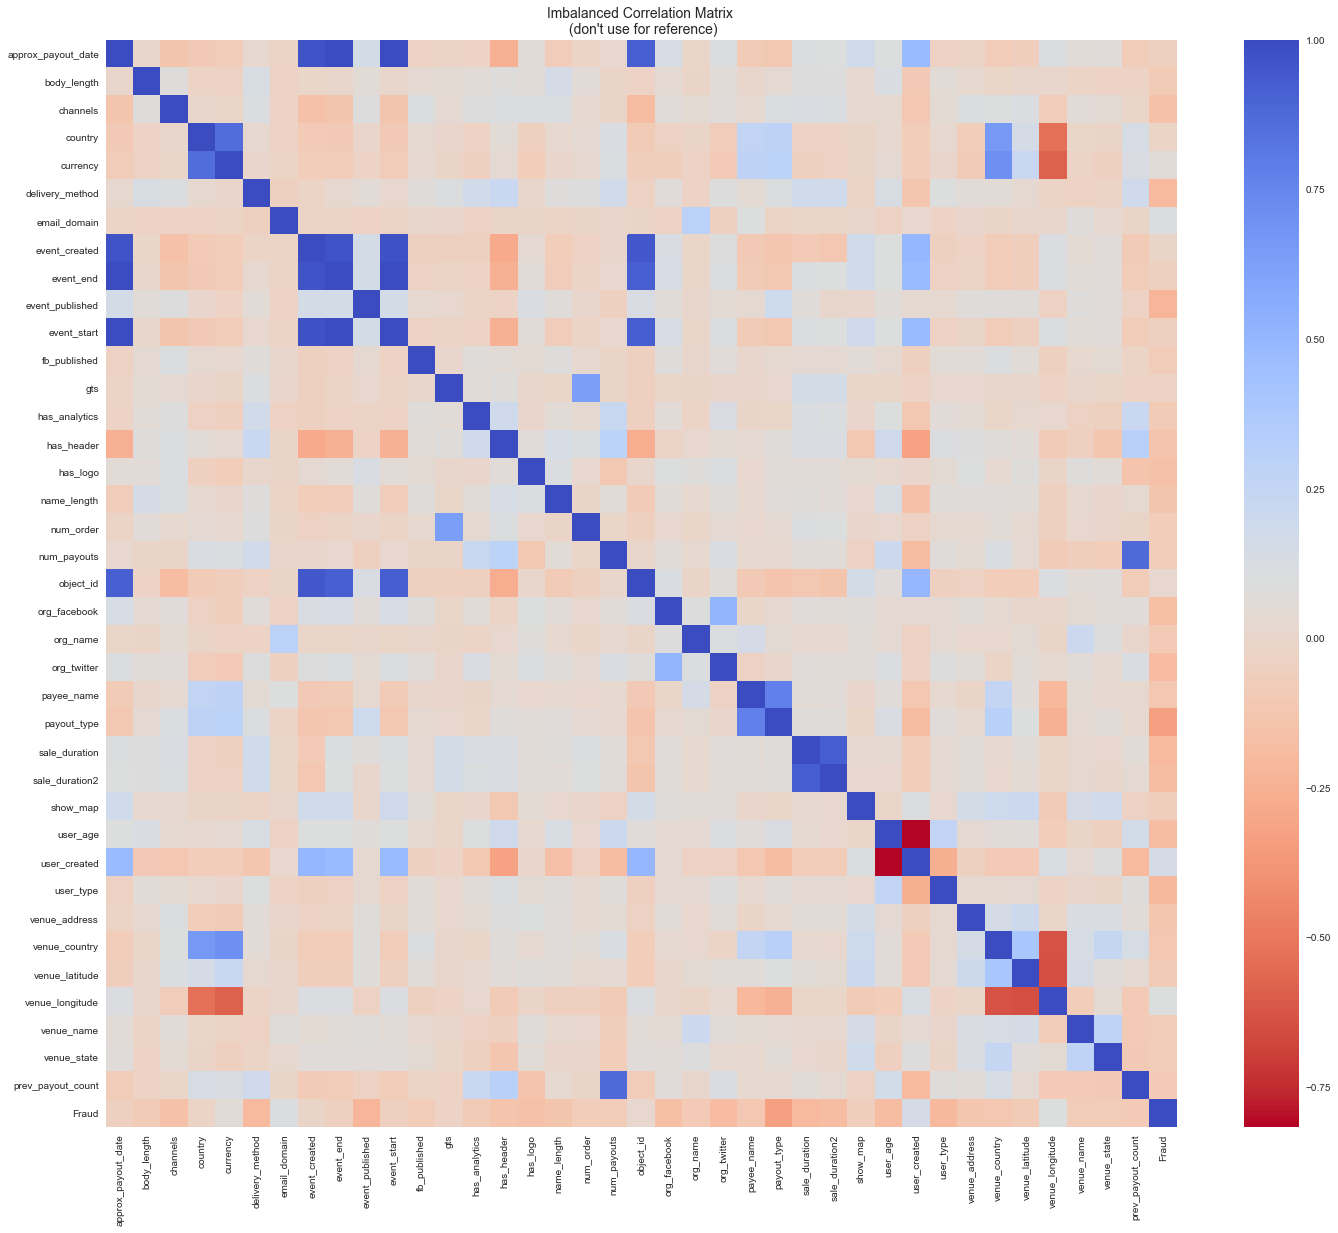

In [293]:
import seaborn as sns

f, ax1 = plt.subplots(figsize=(24,20))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


#sub_sample_corr = new_df.corr()
#sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
#ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

## model1 visualization

In [ ]:
#class_weight= 'balanced'

In [ ]:
X_train , X_test, y_train, y_test =  helper.split_df(df, 'Fraud')

In [18]:
rf= model.random_forest_model(X_train, y_train)
preds= rf.predict(X_test)

print(recall_score(y_test, preds, average='micro'))


0.9456066945606695


In [343]:
print(confusion_matrix(y_test, preds))

[[3099    0    2]
 [  34  129    2]
 [   7    0  312]]


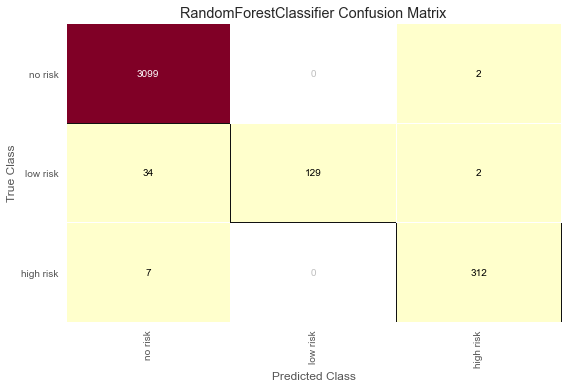

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [356]:
from yellowbrick.classifier import ConfusionMatrix
model = rf
classes = ['no risk', 'low risk', 'high risk']

cm = ConfusionMatrix(
    model, classes=classes,
    label_encoder={0: 'no risk', 1: 'low risk', 2: 'high risk'}
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
#plt.tight_layout()
plt.savefig('images/table1.png', dpi= 300)
cm.show()


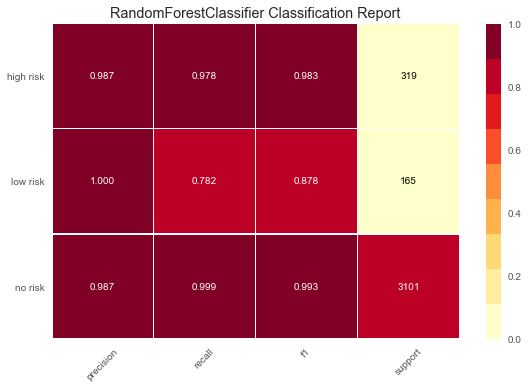

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [357]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
#plt.tight_layout()
plt.savefig('images/table2.png', dpi= 300)
visualizer.show()                       # Finalize and show the figure

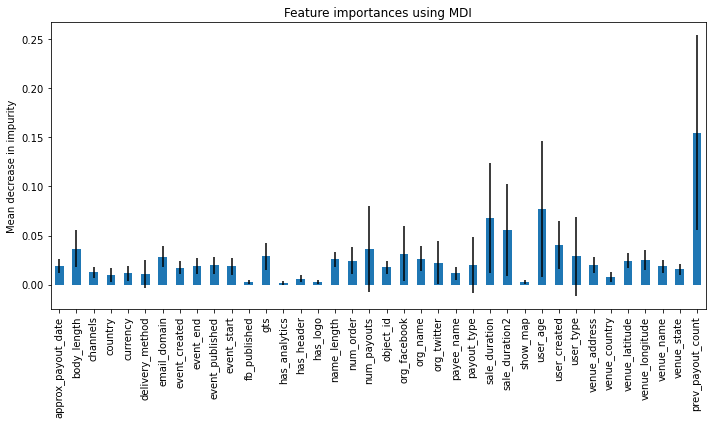

In [258]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots(figsize = (10,6))
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Load the saved model

In [381]:
with open('src/model.pkl', 'rb') as f:
    model = pickle.load(f)

model.predict_proba(X_test.iloc[0:1, :])

array([[1., 0., 0.]])

## model2 visualization

In [162]:
X = intersection_df.iloc[:,:-1]
y = intersection_df['Fraud']
X_train,X_test, y_train, y_test = train_test_split(X,y)

In [156]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14337, 32), (14337,), (10752, 32), (10752,), (3585, 32), (3585,))

In [157]:
intersection_classifier = RandomForestClassifier()
intersection_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [160]:
preds = intersection_classifier.predict(X_test)
print(preds.shape, y_test.shape)
accuracy_score(y_test, preds)

(3585,) (3585,)


0.9366806136680613

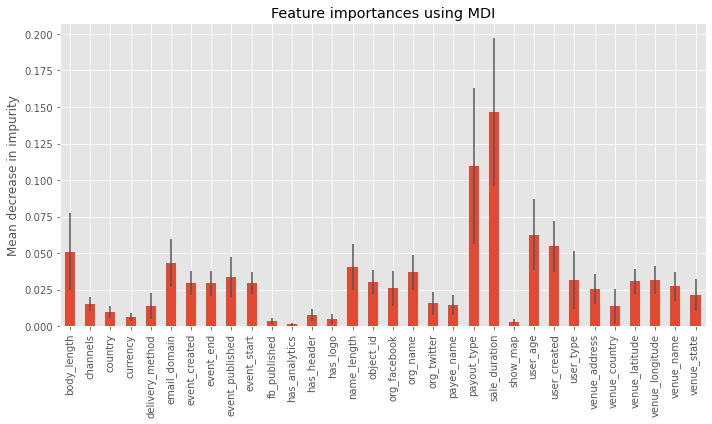

In [163]:
importances = intersection_classifier.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots(figsize = (10,6))
std = np.std([
    tree.feature_importances_ for tree in intersection_classifier.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

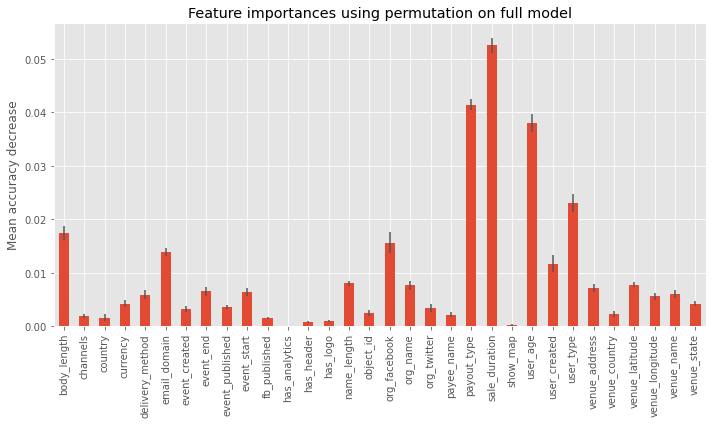

In [167]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    intersection_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)


forest_importances = pd.Series(result.importances_mean, index=X.columns)
fig, ax = plt.subplots(figsize = (10,6))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()